In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df=pd.read_csv("/content/credit_risk_dataset (1).csv")
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [2]:
df.drop(columns=["cb_person_default_on_file","cb_person_cred_hist_length"],inplace=True)
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55


In [3]:
df.shape

(32581, 10)

In [4]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000


In [5]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      31686 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          29465 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ MB


In [7]:
df.isnull().sum()/len(df)

,0
person_age,0.000000
person_income,0.000000
person_home_ownership,0.000000
person_emp_length,0.027470
loan_intent,0.000000
loan_grade,0.000000
loan_amnt,0.000000
loan_int_rate,0.095639
loan_status,0.000000
loan_percent_income,0.000000


In [8]:
print("The missing columns are person_emp_length and loan_int_rate")

The missing columns are person_emp_length and loan_int_rate


<Axes: >

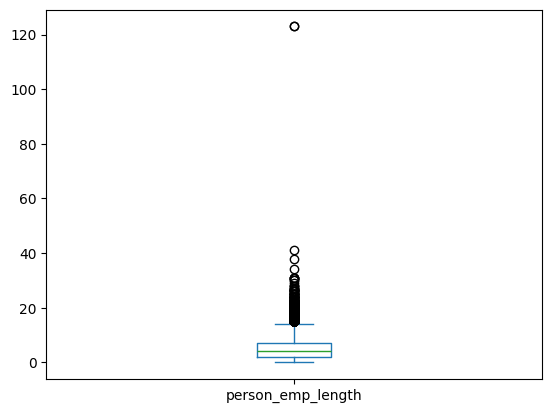

In [9]:
df["person_emp_length"].plot(kind="box")

In [10]:
a=df["person_emp_length"].median()
df["person_emp_length"].fillna(a,inplace=True)

<Axes: >

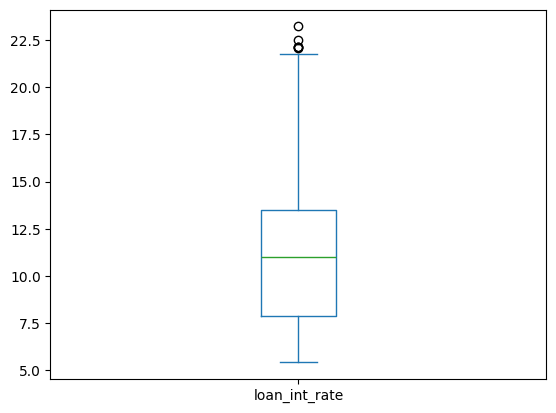

In [11]:
df["loan_int_rate"].plot(kind="box")

In [12]:
b=df["loan_int_rate"].median()
df["loan_int_rate"].fillna(b,inplace=True)

In [13]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,0
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,0
loan_status,0
loan_percent_income,0


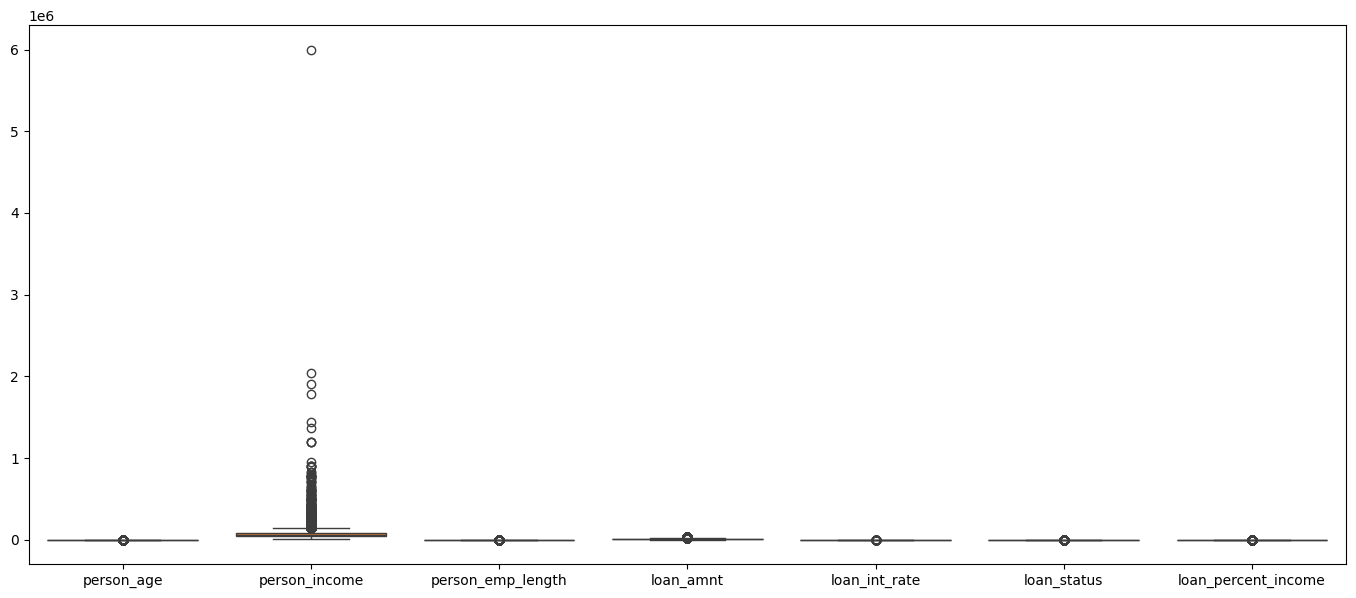

In [14]:
plt.figure(figsize=(17, 7))
sns.boxplot(data=df)
plt.show()

In [15]:
q1=df["person_income"].quantile(0.25)
q1

np.float64(38500.0)

In [16]:
q3=df["person_income"].quantile(0.75)
q3

np.float64(79200.0)

In [17]:
IQR=q3-q1
IQR

np.float64(40700.0)

In [18]:
lower_boundary=q1-1.5*IQR
lower_boundary

np.float64(-22550.0)

In [19]:
upper_boundary=q3+1.5*IQR
upper_boundary

np.float64(140250.0)

In [20]:
df1=df[(df["person_income"]>lower_boundary)&(df["person_income"]<upper_boundary)]
df1

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55
...,...,...,...,...,...,...,...,...,...,...
32575,52,64500,RENT,0.0,EDUCATION,B,5000,11.26,0,0.08
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   person_age             32581 non-null  int64  
 1   person_income          32581 non-null  int64  
 2   person_home_ownership  32581 non-null  object 
 3   person_emp_length      32581 non-null  float64
 4   loan_intent            32581 non-null  object 
 5   loan_grade             32581 non-null  object 
 6   loan_amnt              32581 non-null  int64  
 7   loan_int_rate          32581 non-null  float64
 8   loan_status            32581 non-null  int64  
 9   loan_percent_income    32581 non-null  float64
dtypes: float64(3), int64(4), object(3)
memory usage: 2.5+ MB


<Axes: >

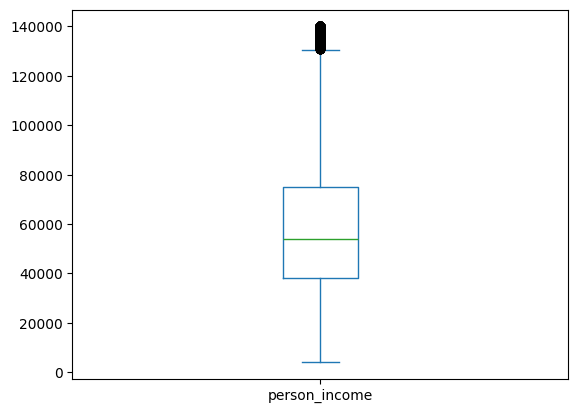

In [22]:
df1["person_income"].plot(kind="box")

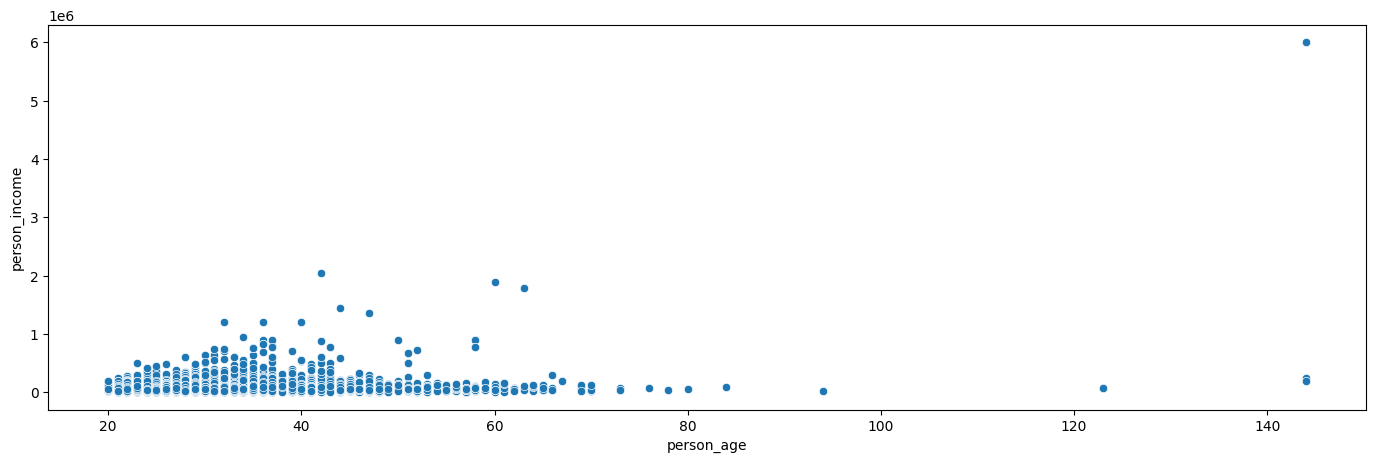

In [23]:
plt.figure(figsize=(17, 5))
sns.scatterplot(data=df,y="person_income",x="person_age")
plt.show()

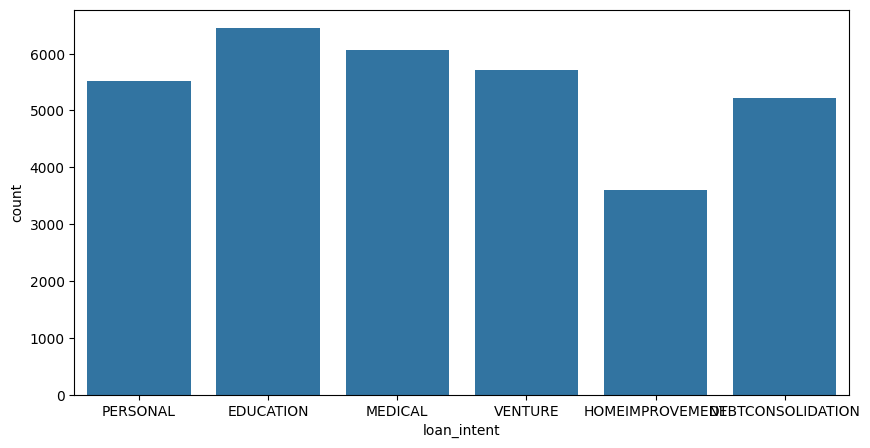

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df,x="loan_intent")
plt.show()

From the above graph we can see that the more loan has been taken for the education and medical

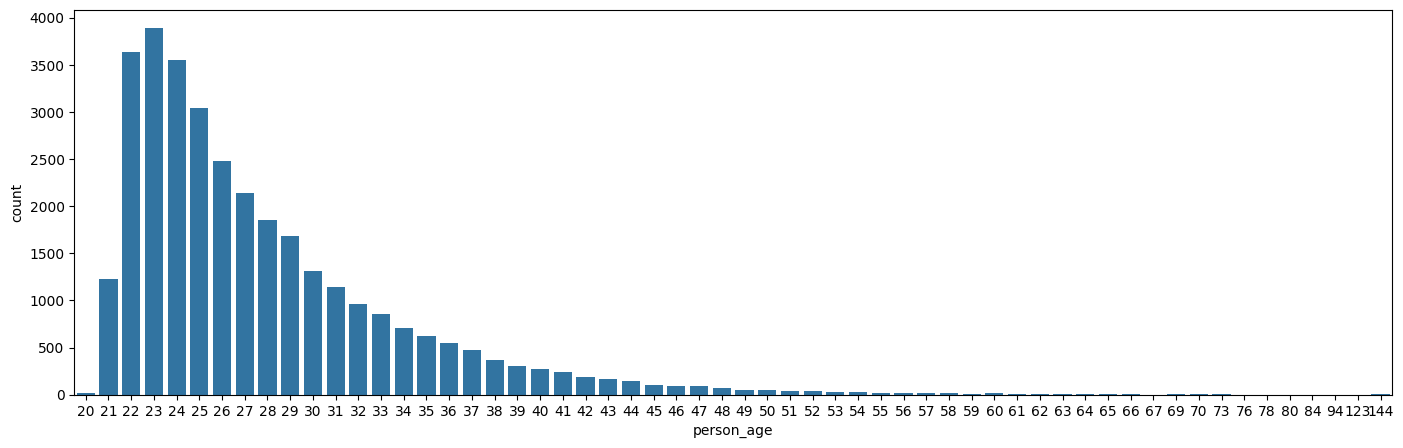

In [25]:
plt.figure(figsize=(17, 5))
sns.countplot(data=df,x="person_age")
plt.show()

From the above analysis we can see that the most of the loans has been taken at the age of 23,22,24

In [26]:
df.groupby("loan_intent")["loan_amnt"].mean()


,loan_amnt
loan_intent,
DEBTCONSOLIDATION,9594.886800
EDUCATION,9482.678599
HOMEIMPROVEMENT,10360.520111
MEDICAL,9259.582441
PERSONAL,9573.772867
VENTURE,9583.777758


From the above we can see that the average loan amount for the particular loan intent

In [27]:
df.groupby("loan_amnt")["loan_int_rate"].mean()

,loan_int_rate
loan_amnt,
500,10.666000
700,12.290000
725,7.370000
750,12.290000
800,7.370000
...,...
33250,13.060000
33950,11.220000
34000,13.217500


In [28]:
df.groupby("loan_intent")["loan_int_rate"].mean()

,loan_int_rate
loan_intent,
DEBTCONSOLIDATION,10.983926
EDUCATION,10.953950
HOMEIMPROVEMENT,11.182702
MEDICAL,11.053026
PERSONAL,10.997466
VENTURE,10.952404


From the above we can see that the average loan interest rate for the particular loan intent

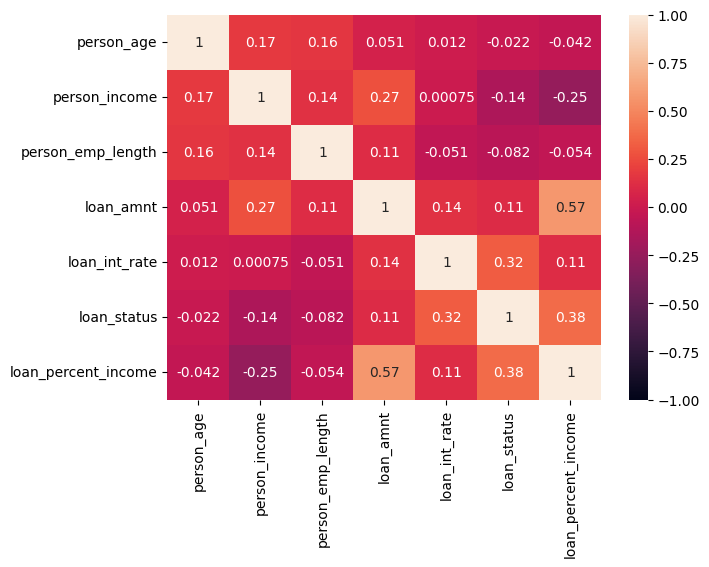

In [29]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(7,5))
sns.heatmap(numeric_df.corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [30]:
#seperating input and target variable
x=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [31]:
#split into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=0)
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(24435, 9) (24435,)
(8146, 9) (8146,)


In [32]:
#seperating num and cat columns
x_train_cat=x_train.select_dtypes(include=["object"])
x_train_num=x_train.select_dtypes(include=["int64","float64"])

In [33]:
#rescaling numeric features
from sklearn.preprocessing import MinMaxScaler
MinMax_scalar=MinMaxScaler()
#data converted to a nd numpy array
x_train_num_transformed=pd.DataFrame(MinMax_scalar.fit_transform(x_train_num),columns=MinMax_scalar.get_feature_names_out(),index=x_train_num.index)
x_train_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
12231,0.016129,0.012675,0.03252,0.195652,0.333733,0.115385
23891,0.080645,0.010507,0.04878,0.275362,0.094068,0.192308
1191,0.040323,0.009199,0.00000,0.466667,0.524865,0.358974
8463,0.032258,0.009006,0.04065,0.188406,0.094068,0.153846
17638,0.032258,0.007005,0.00000,0.158696,0.541642,0.166667


In [34]:
#one hot encoding the categorical columns
from sklearn.preprocessing import OneHotEncoder
onehot_encoder=OneHotEncoder(sparse_output=False,handle_unknown="ignore")      #handle_unknown=ignore only takes teh values which are in train data the test data values are ignored
x_train_cat_transformed=pd.DataFrame(onehot_encoder.fit_transform(x_train_cat),
                                     columns=onehot_encoder.get_feature_names_out(),index=x_train_cat.index)
print("shape of the data before transformation=",x_train_cat.shape)
print("shape of the data after transformation=",x_train_cat_transformed.shape)
x_train_cat_transformed.head()

shape of the data before transformation= (24435, 3)
shape of the data after transformation= (24435, 17)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
12231,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8463,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
x_train_transformed=pd.concat([x_train_num_transformed,x_train_cat_transformed],axis=1)
x_train_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
12231,0.016129,0.012675,0.03252,0.195652,0.333733,0.115385,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
23891,0.080645,0.010507,0.04878,0.275362,0.094068,0.192308,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1191,0.040323,0.009199,0.00000,0.466667,0.524865,0.358974,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8463,0.032258,0.009006,0.04065,0.188406,0.094068,0.153846,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
17638,0.032258,0.007005,0.00000,0.158696,0.541642,0.166667,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [36]:
#x_test
x_test_cat=x_test.select_dtypes(include=["object"])
x_test_num=x_test.select_dtypes(include=["int64","float64"])

In [37]:
x_test_num_transformed=pd.DataFrame(MinMax_scalar.fit_transform(x_test_num),columns=MinMax_scalar.get_feature_names_out(),index=x_test_num.index)
x_test_num_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income
2124,0.038835,0.020489,0.052632,0.055072,0.407865,0.072289
252,0.038835,0.045080,0.131579,0.710145,0.292135,0.349398
13083,0.038835,0.046768,0.105263,0.159420,0.252247,0.084337
12447,0.029126,0.042897,0.078947,0.420290,0.271348,0.216867
31009,0.184466,0.038327,0.078947,0.275362,0.117416,0.168675


In [38]:
x_test_cat_transformed=pd.DataFrame(onehot_encoder.fit_transform(x_test_cat),
                                     columns=onehot_encoder.get_feature_names_out(),index=x_test_cat.index)
print("shape of the data before transformation=",x_test_cat.shape)
print("shape of the data after transformation=",x_test_cat_transformed.shape)
x_test_cat_transformed.head()

shape of the data before transformation= (8146, 3)
shape of the data after transformation= (8146, 17)


,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
2124,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13083,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31009,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
x_test_transformed=pd.concat([x_test_num_transformed,x_test_cat_transformed],axis=1)
x_test_transformed.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G
2124,0.038835,0.020489,0.052632,0.055072,0.407865,0.072289,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
252,0.038835,0.045080,0.131579,0.710145,0.292135,0.349398,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
13083,0.038835,0.046768,0.105263,0.159420,0.252247,0.084337,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
12447,0.029126,0.042897,0.078947,0.420290,0.271348,0.216867,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
31009,0.184466,0.038327,0.078947,0.275362,0.117416,0.168675,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


###LogisticRegression

In [40]:
from sklearn.linear_model import LogisticRegression
import time

lr_model=LogisticRegression()

st=time.time()
lr_model.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ", et-st)


Total time taken to train the model  0.8937251567840576


In [41]:
st=time.time()
y_test_pred_lr=lr_model.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction ", et-st)

Total time taken for prediction  0.0038254261016845703


In [42]:
from sklearn.metrics import accuracy_score

print("Accuracy of lr model", accuracy_score(y_test,y_test_pred_lr))

Accuracy of lr model 0.8688927080775841


###KNeighbors

In [43]:
from sklearn.neighbors import KNeighborsClassifier

knn_model=KNeighborsClassifier()

st=time.time()
knn_model.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ", et-st)

Total time taken to train the model  0.015932083129882812


In [44]:
st=time.time()
y_test_pred_knn=knn_model.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction ", et-st)

Total time taken for prediction  4.479078054428101


In [45]:
print("Accuracy of knn model", accuracy_score(y_test,y_test_pred_knn))

Accuracy of knn model 0.896759145592929


###DecisionTree

In [46]:
from sklearn.tree import DecisionTreeClassifier

dt_model=DecisionTreeClassifier()

st=time.time()
dt_model.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ", et-st)

Total time taken to train the model  0.18734049797058105


In [47]:
st=time.time()
y_test_pred_dt=dt_model.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction ", et-st)

Total time taken for prediction  0.0053212642669677734


In [48]:

print("Accuracy of dt model", accuracy_score(y_test,y_test_pred_dt))

Accuracy of dt model 0.8043211392094279


###RandomForest

In [49]:
from sklearn.ensemble import RandomForestClassifier

rf_model=RandomForestClassifier()

st=time.time()
rf_model.fit(x_train_transformed,y_train)
et=time.time()
print("Total time taken to train the model ", et-st)

Total time taken to train the model  3.838714599609375


In [50]:
st=time.time()
y_test_pred_rf=rf_model.predict(x_test_transformed)
et=time.time()
print("Total time taken for prediction ", et-st)

Total time taken for prediction  0.1256723403930664


In [51]:
print("Accuracy of rf model", accuracy_score(y_test,y_test_pred_rf))


Accuracy of rf model 0.8987232997790326


###Dataframe

In [53]:
df1=pd.DataFrame({"Model":["LR_classifier","Knn_Classifier","DT_Classifier","RF_Classifier"],
                     "Accuracy":[0.868,0.896,0.804,0.898],
                     "TrainingTime":[0.893,0.015,0.187,3.838],
                     "PredictionTime":[0.003,4.479,0.005,0.125]})
df1

,Model,Accuracy,TrainingTime,PredictionTime
0,LR_classifier,0.868,0.893,0.003
1,Knn_Classifier,0.896,0.015,4.479
2,DT_Classifier,0.804,0.187,0.005
3,RF_Classifier,0.898,3.838,0.125


In [55]:
df1.to_csv("Model_classifier",index=False,mode="x")

<Axes: xlabel='Model', ylabel='Accuracy'>

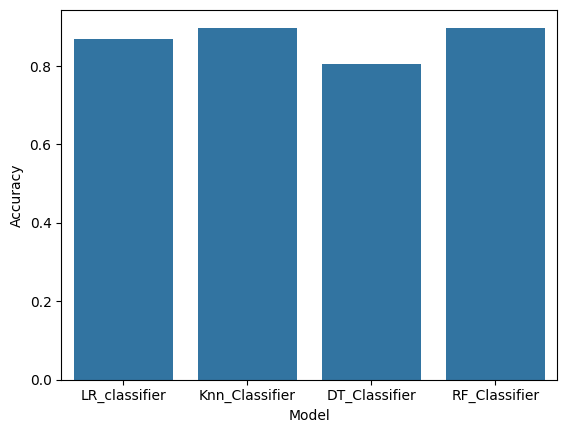

In [57]:
sns.barplot(data=df1,x="Model",y="Accuracy")

<Axes: xlabel='Model', ylabel='TrainingTime'>

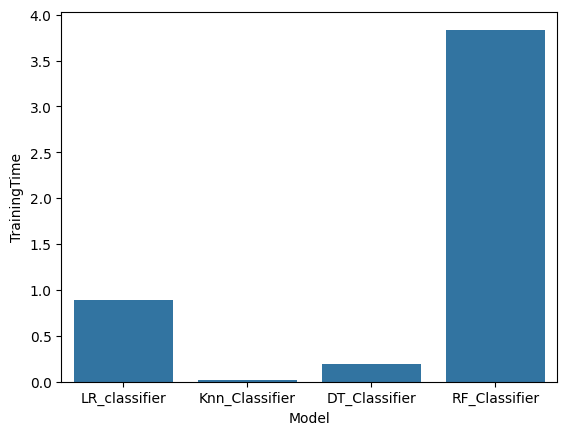

In [58]:
sns.barplot(data=df1,x="Model",y="TrainingTime")

<Axes: xlabel='Model', ylabel='PredictionTime'>

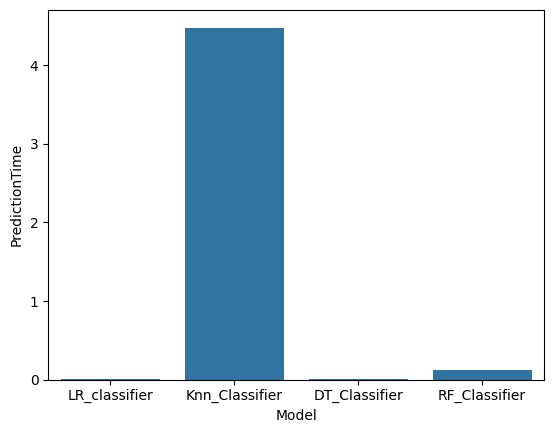

In [59]:
sns.barplot(data=df1,x="Model",y="PredictionTime")

In [ ]:
from sklearn.metrics import confusion_matrix
print("Confusion matrix display of lr model")
cm=confusion_matrix(y_test,y_test_pred_lr)
cm

Confusion matrix display of lr model


array([[6254,  228],
       [ 840,  824]])

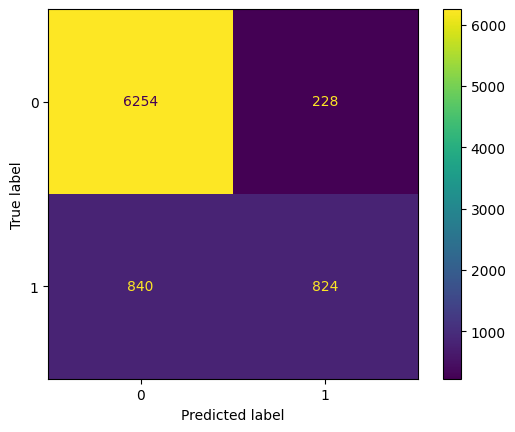

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
fig=ConfusionMatrixDisplay(cm,display_labels=lr_model.classes_)
fig.plot()